# Example of BTTB Squared Euclidean Distance Matrix (SEDM)

This notebook illustrates an SEDM computed with observation points and sources arranged on the same y-oriented $3 \times 4$ horizontal grid. In this case, the SEDM is a BTTB formed by $3 \times 3$ blocks with shape $4 \times 4$.

### Import required stuff

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sedm

### Define the computation points

In [2]:
# y1, y2, x1, x2 (in meters)
area = [10, 40, 10, 30]

# Ny, Nx
shape = (4, 3)

In [3]:
# Define the coordinates xp, yp, zp of the observation points
yp = np.linspace(area[0], area[1], shape[0])
xp = np.linspace(area[2], area[3], shape[1])

yp, xp = np.meshgrid(yp, xp)
yp = np.ravel(yp)
xp = np.ravel(xp)
zp = np.zeros_like(xp)

# Matrix of observation points
P = np.vstack([yp, xp, zp])

In [4]:
P.shape

(3, 12)

In [5]:
# Note that the points are arranged in an y-oriented grid
P

array([[10., 20., 30., 40., 10., 20., 30., 40., 10., 20., 30., 40.],
       [10., 10., 10., 10., 20., 20., 20., 20., 30., 30., 30., 30.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [16]:
# Point indices
print(np.arange(shape[0]*shape[1]).reshape(shape[::-1])[::-1,:])

[[ 8  9 10 11]
 [ 4  5  6  7]
 [ 0  1  2  3]]


### Define the sources

In [6]:
# Define the coordinates xs, ys, zs of the sources
ys = np.copy(yp)
xs = np.copy(xp)
zs = zp + 10

In [7]:
# Matrix of sources
S = np.vstack([ys, xs, zs])

In [8]:
S.shape

(3, 12)

In [9]:
S

array([[10., 20., 30., 40., 10., 20., 30., 40., 10., 20., 30., 40.],
       [10., 10., 10., 10., 20., 20., 20., 20., 30., 30., 30., 30.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.]])

### Squared Euclidean Distance Matrix D

In [10]:
# Since the computation points are arranged in an y-oriented grid
# and there is a source below each point, the matrix D is a BTTB formed
# by Nx x Nx blocks with shape Ny x Ny
D = sedm.avoid_sqrt_inner_loops(P, S)

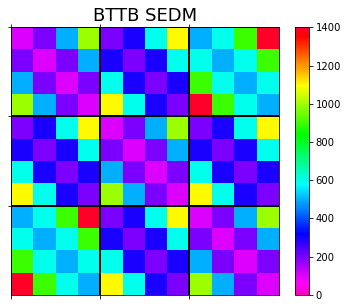

In [17]:
# The number of blocks is defined by the number of points along x-axis
N_blocks = shape[1]

# the number of points per block is defined by the number of points along y-axis
N_points_per_block = shape[0]

# Plot the SEDM D
plt.figure(figsize=(6,6))
plt.title('BTTB SEDM', fontsize=18)
#plt.matshow(D, fignum=0, vmin = 0, vmax = 20, cmap='gist_rainbow_r')
plt.matshow(D, fignum=0, vmin = 0, cmap='gist_rainbow_r')
plt.colorbar(shrink=0.82)
plt.xticks(ticks=np.arange(N_blocks)*N_points_per_block - 0.5, labels=[])
plt.yticks(ticks=np.arange(N_blocks)*N_points_per_block - 0.5, labels=[])
plt.grid(color='k', linewidth=2)
plt.show()